In [26]:
# Import libraries
import numpy as np
import pandas as pd
# from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os as os

In [27]:
# data path = where we store the data, plots and catalogue
data_path = "./data/lunar/training/"
raw_data_path = data_path + "data/S12_GradeA/"
catalogue_path = data_path + "catalogs/apollo12_catalog_GradeA_final.csv"
print(catalogue_path)

./data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv


In [28]:
df = pd.read_csv(catalogue_path)

In [29]:
filenames = df["filename"]

In [30]:
filenames

0     xa.s12.00.mhz.1970-01-19HR00_evid00002
1     xa.s12.00.mhz.1970-03-25HR00_evid00003
2     xa.s12.00.mhz.1970-03-26HR00_evid00004
3     xa.s12.00.mhz.1970-04-25HR00_evid00006
4     xa.s12.00.mhz.1970-04-26HR00_evid00007
                       ...                  
71    xa.s12.00.mhz.1974-10-14HR00_evid00156
72    xa.s12.00.mhz.1975-04-12HR00_evid00191
73    xa.s12.00.mhz.1975-05-04HR00_evid00192
74    xa.s12.00.mhz.1975-06-24HR00_evid00196
75    xa.s12.00.mhz.1975-06-26HR00_evid00198
Name: filename, Length: 76, dtype: object

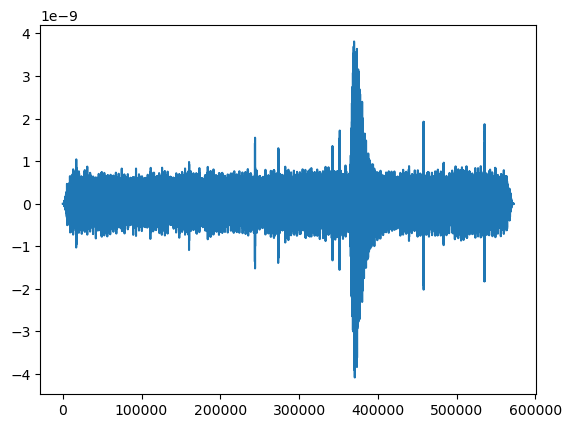

0         0.517027
1         0.517027
2         0.517027
3         0.517027
4         0.517027
            ...   
572422    0.517027
572423    0.517027
572424    0.517027
572425    0.517027
572426    0.517027
Name: velocity(m/s), Length: 572427, dtype: float64


In [41]:
dfs = []

for i in filenames.to_list():
    if os.path.exists(raw_data_path+i+".csv"):
        # dfs.append(pd.read_csv(raw_data_path + i + ".csv"))
        tmp = pd.read_csv(raw_data_path + "test" + ".csv")
        tmp["velocity(m/s)"].plot()
        plt.show()
        
        tmp["velocity(m/s)"] = tmp["velocity(m/s)"].round(13)
        output_path = raw_data_path + "test" + "_rounded.csv"
        tmp.to_csv(output_path, index=False)

        applyScale(tmp)
        
        break

        

In [40]:
def applyScale(data):
    top = data["velocity(m/s)"].max()
    bottom = data["velocity(m/s)"].min()
    data["velocity(m/s)"] = data["velocity(m/s)"] - bottom # remove the minimum value from all data points
    data["velocity(m/s)"] = data["velocity(m/s)"] / (top - bottom) # divide by the range
    
    output_path = raw_data_path + "scaletest" + ".csv"
    data.to_csv(output_path, index=False)

    print(data["velocity(m/s)"])
    return 0

In [25]:
print(dfs)

[]
